### Imports

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import json
from envyaml import EnvYAML
import datetime
import numpy as np

### Overall View

In [3]:
VAR_ENV = EnvYAML("../../../env.yaml")
path_list = [os.path.join("../../..", VAR_ENV["dataset.path"], VAR_ENV["dataset.version"],
                          f"P{i:02d}", "E4") for i in range(1, VAR_ENV["dataset.participants"] + 1)]

../../../data/v1/P17/E4


/tmp/ipykernel_45129/273568695.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_modified = pd.read_csv(os.path.join(path, "modified_ACC.csv"))


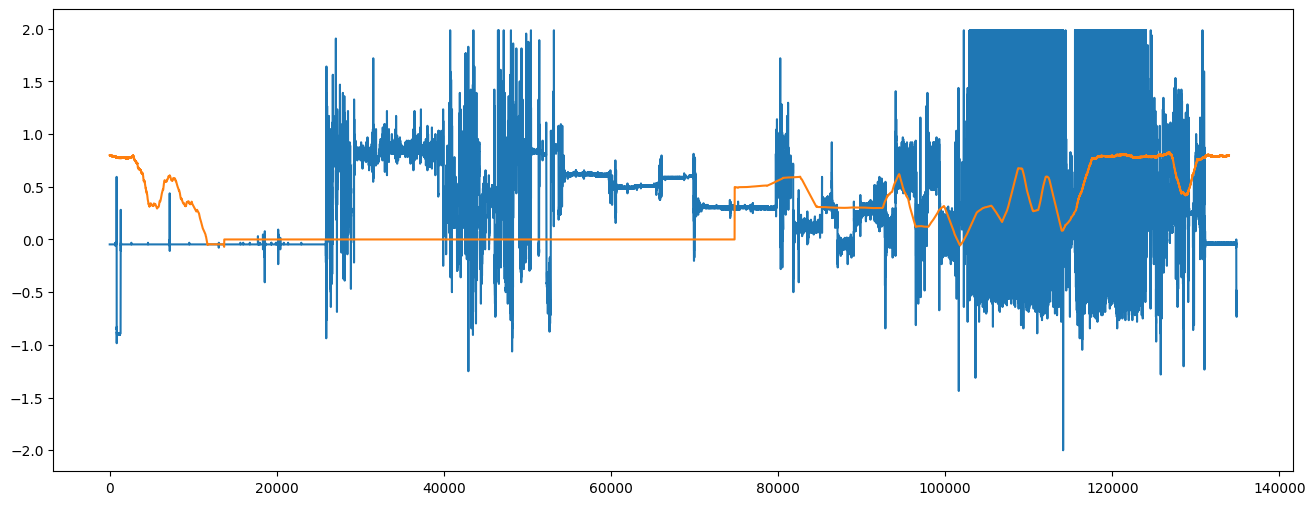

In [6]:
# dataset manipulation
for path in path_list[16:17]:
    print(path)
    # df_temp = pd.read_csv(os.path.join(path, "modified_ACC.csv"))
    df = pd.read_csv(os.path.join(path, "ACC.csv"))
    df_modified = pd.read_csv(os.path.join(path, "modified_ACC.csv"))

    initial_time = float(df.columns[0])
    frequency = float(df.iloc[0, 0])
    df = df.drop([0])
    df.columns = ["acc_x", "acc_y", "acc_z"]
    df["acc_x"] = df["acc_x"]/64
    # df_temp["acc_y"] = df["acc_y"]/64
    # df_temp["acc_z"] = df["acc_z"]/64
    timestamps = [datetime.datetime.fromtimestamp(
        initial_time+(i/frequency), datetime.timezone(datetime.timedelta(hours=0))) for i in range(len(df))]
    df.insert(0, "timestamp", timestamps, True)


    # Set the width and height of the figure
    plt.figure(figsize=(16,6))
    # Line chart showing how each person accelerometer data evolved over time 
    plt.plot(df.acc_x)
    plt.plot(df_modified.acc_x_avg)
    # plt.plot(df.acc_z)
    # plt.xticks(np.arange(0,len(df),len(df)//16), df.timestamp[0:len(df):len(df)//16], rotation=90)
    plt.show()

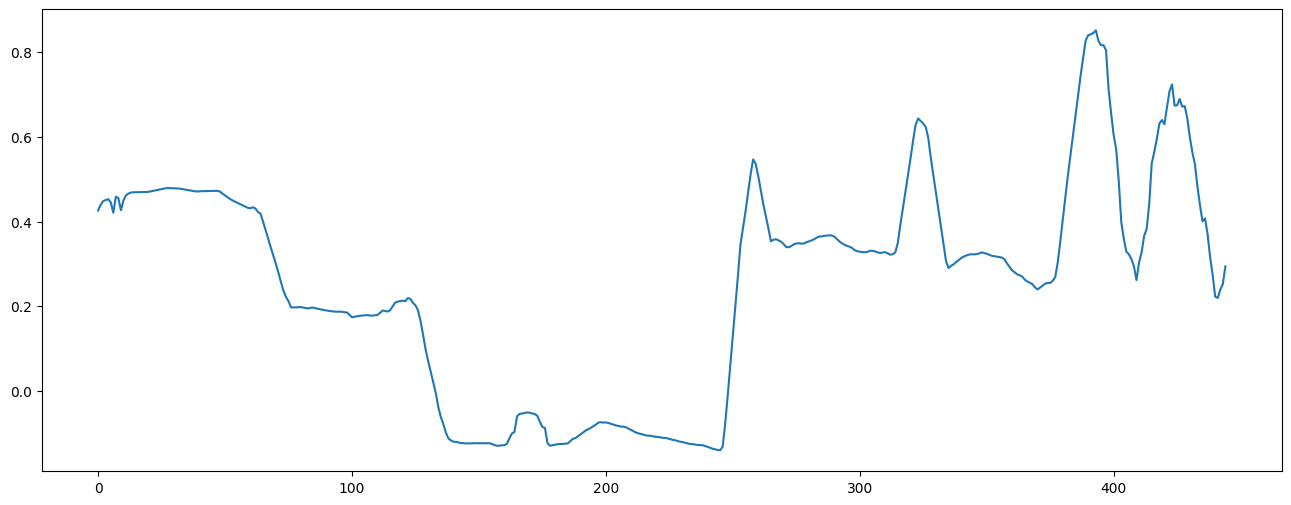

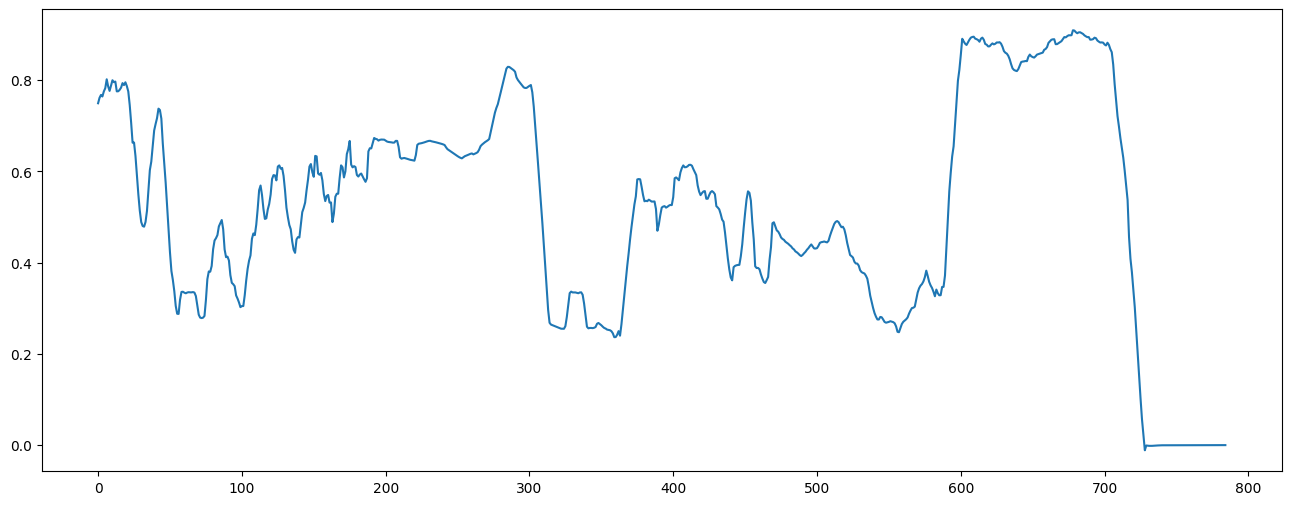

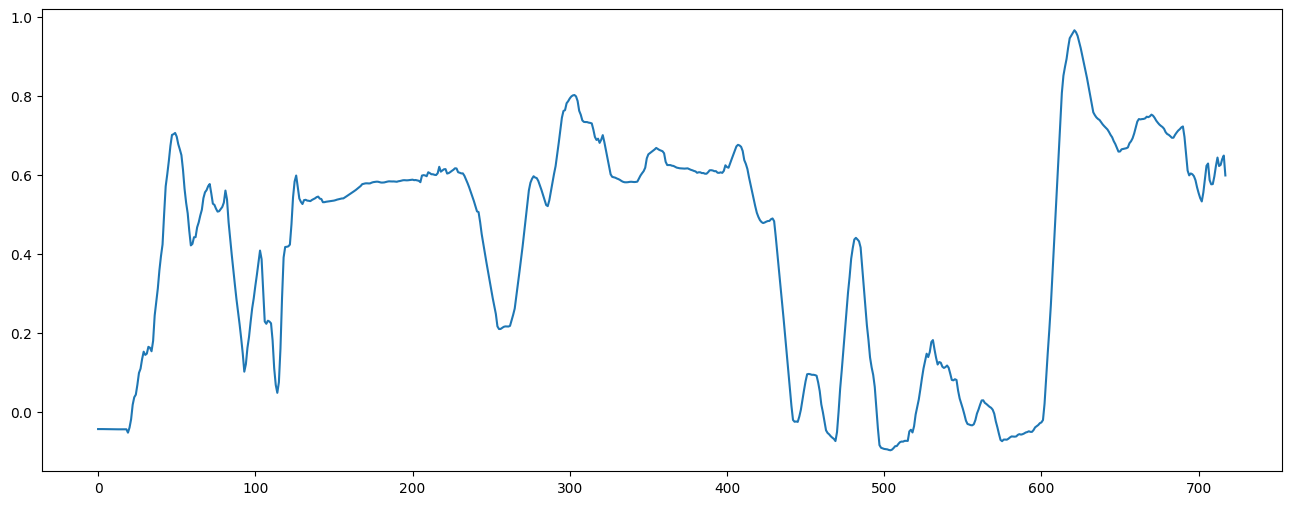

In [9]:
# dataset manipulation
for path in path_list[:3]:
    df_temp = pd.read_csv(os.path.join(path, "modified_0_rows_removed_ACC.csv"))
    df = pd.read_csv(os.path.join(path, "modified_with_tsfresh_ACC.csv"))
    # df = pd.read_csv(os.path.join(path_list[0], "ACC.csv"))

    # initial_time = float(df.columns[0])
    # frequency = float(df.iloc[0, 0])
    # df = df.drop([0])
    # df.columns = ["acc_x", "acc_y", "acc_z"]
    # df_temp["acc_x"] = df["acc_x"]/64
    # df_temp["acc_y"] = df["acc_y"]/64
    # df_temp["acc_z"] = df["acc_z"]/64


    # Set the width and height of the figure
    plt.figure(figsize=(16,6))
    # Line chart showing how each person accelerometer data evolved over time 
    # plt.plot(df_temp.acc_x_avg)
    plt.plot(df.ax_mean_wristband_wrist_acc)
    # plt.xticks(np.arange(0,len(df_temp),len(df_temp)//6), df_temp.timestamp[0:len(df_temp):len(df_temp)//6], rotation=90)
    plt.show()